In [19]:
#Import libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [20]:
#Get data
filename= r'C:\Users\shachini dinushika\Downloads\taiwanese+bankruptcy+prediction\data.csv'
df=pd.read_csv(filename)
df.head()
###load data sets 


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [4]:
#df.columns


In [22]:
##check for null values
df.isnull().sum().sum()

0

In [31]:
#check for duplicated values
df.duplicated().sum()

0

In [23]:
#Understand data types

##information on data classes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [24]:
finr_df = df[[' Current Ratio',' Debt ratio %',' Operating Gross Margin',' Operating Profit Growth Rate',' Cash Flow to Sales','Bankrupt?']] 



In [25]:
finr_df.head()

,Current Ratio,Debt ratio %,Operating Gross Margin,Operating Profit Growth Rate,Cash Flow to Sales,Bankrupt?
0,0.002259,0.207576,0.601457,0.848195,0.671568,1
1,0.006016,0.171176,0.610235,0.848088,0.671570,1
2,0.011543,0.207516,0.601450,0.848094,0.671571,1
3,0.004194,0.151465,0.583541,0.848005,0.671519,1
4,0.006022,0.106509,0.598783,0.848258,0.671563,1


In [26]:
#Estimates of location
## central tendancy - mean,median,mode,quartiles etc
#Estimates of variability(Dispersion of data)
##variance,std dev,range,min,max,median,quartiles
finr_df.describe()

,Current Ratio,Debt ratio %,Operating Gross Margin,Operating Profit Growth Rate,Cash Flow to Sales,Bankrupt?
count,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000
mean,4.032850e+05,0.113177,0.607948,0.847980,0.671531,0.032263
std,3.330216e+07,0.053920,0.016934,0.010752,0.009341,0.176710
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.555047e-03,0.072891,0.600445,0.847984,0.671565,0.000000
50%,1.058717e-02,0.111407,0.605997,0.848044,0.671574,0.000000
75%,1.626953e-02,0.148804,0.613914,0.848123,0.671587,0.000000
max,2.750000e+09,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<Axes: title={'center': ' Current Ratio'}>,
        <Axes: title={'center': ' Debt ratio %'}>],
       [<Axes: title={'center': ' Operating Gross Margin'}>,
        <Axes: title={'center': ' Operating Profit Growth Rate'}>],
       [<Axes: title={'center': ' Cash Flow to Sales'}>,
        <Axes: title={'center': 'Bankrupt?'}>]], dtype=object)

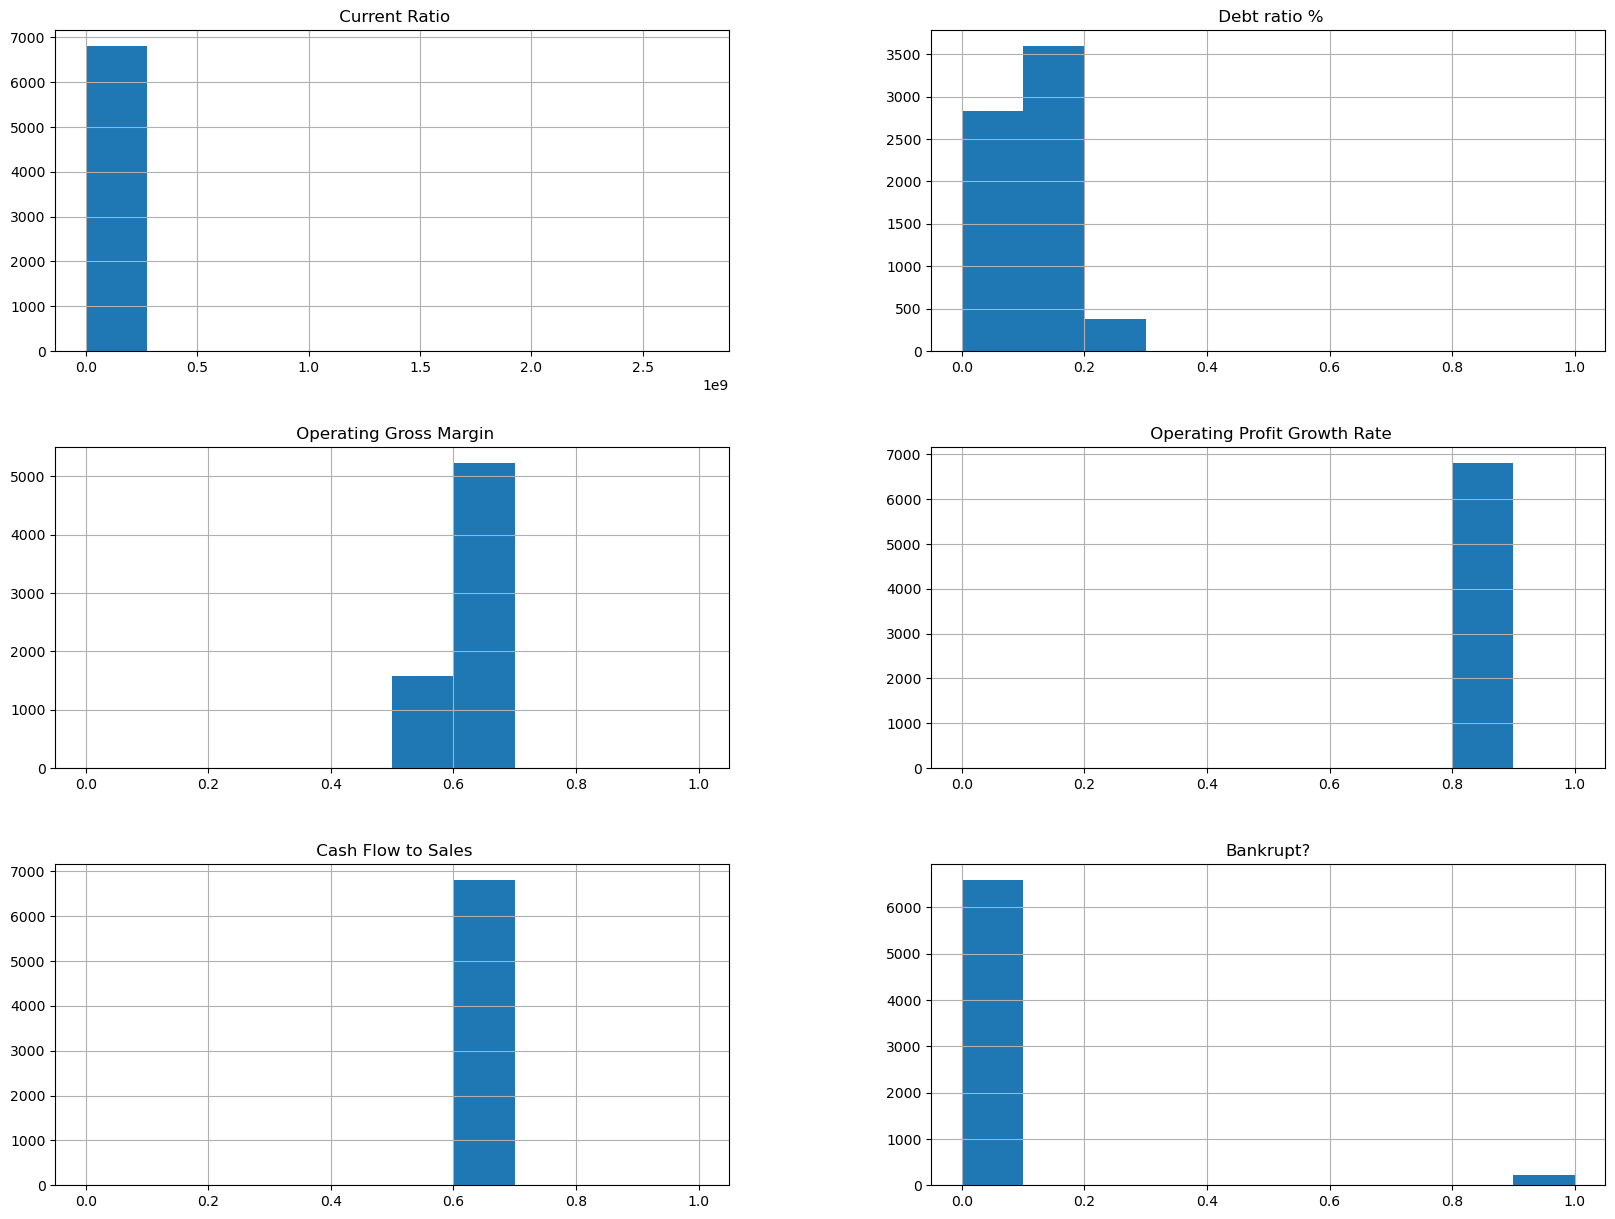

In [27]:
#Exploring the Data Distribution
##box plots,freqency table,histogram,density plots
finr_df.hist(bins=10, figsize=(20,15))

<Axes: >

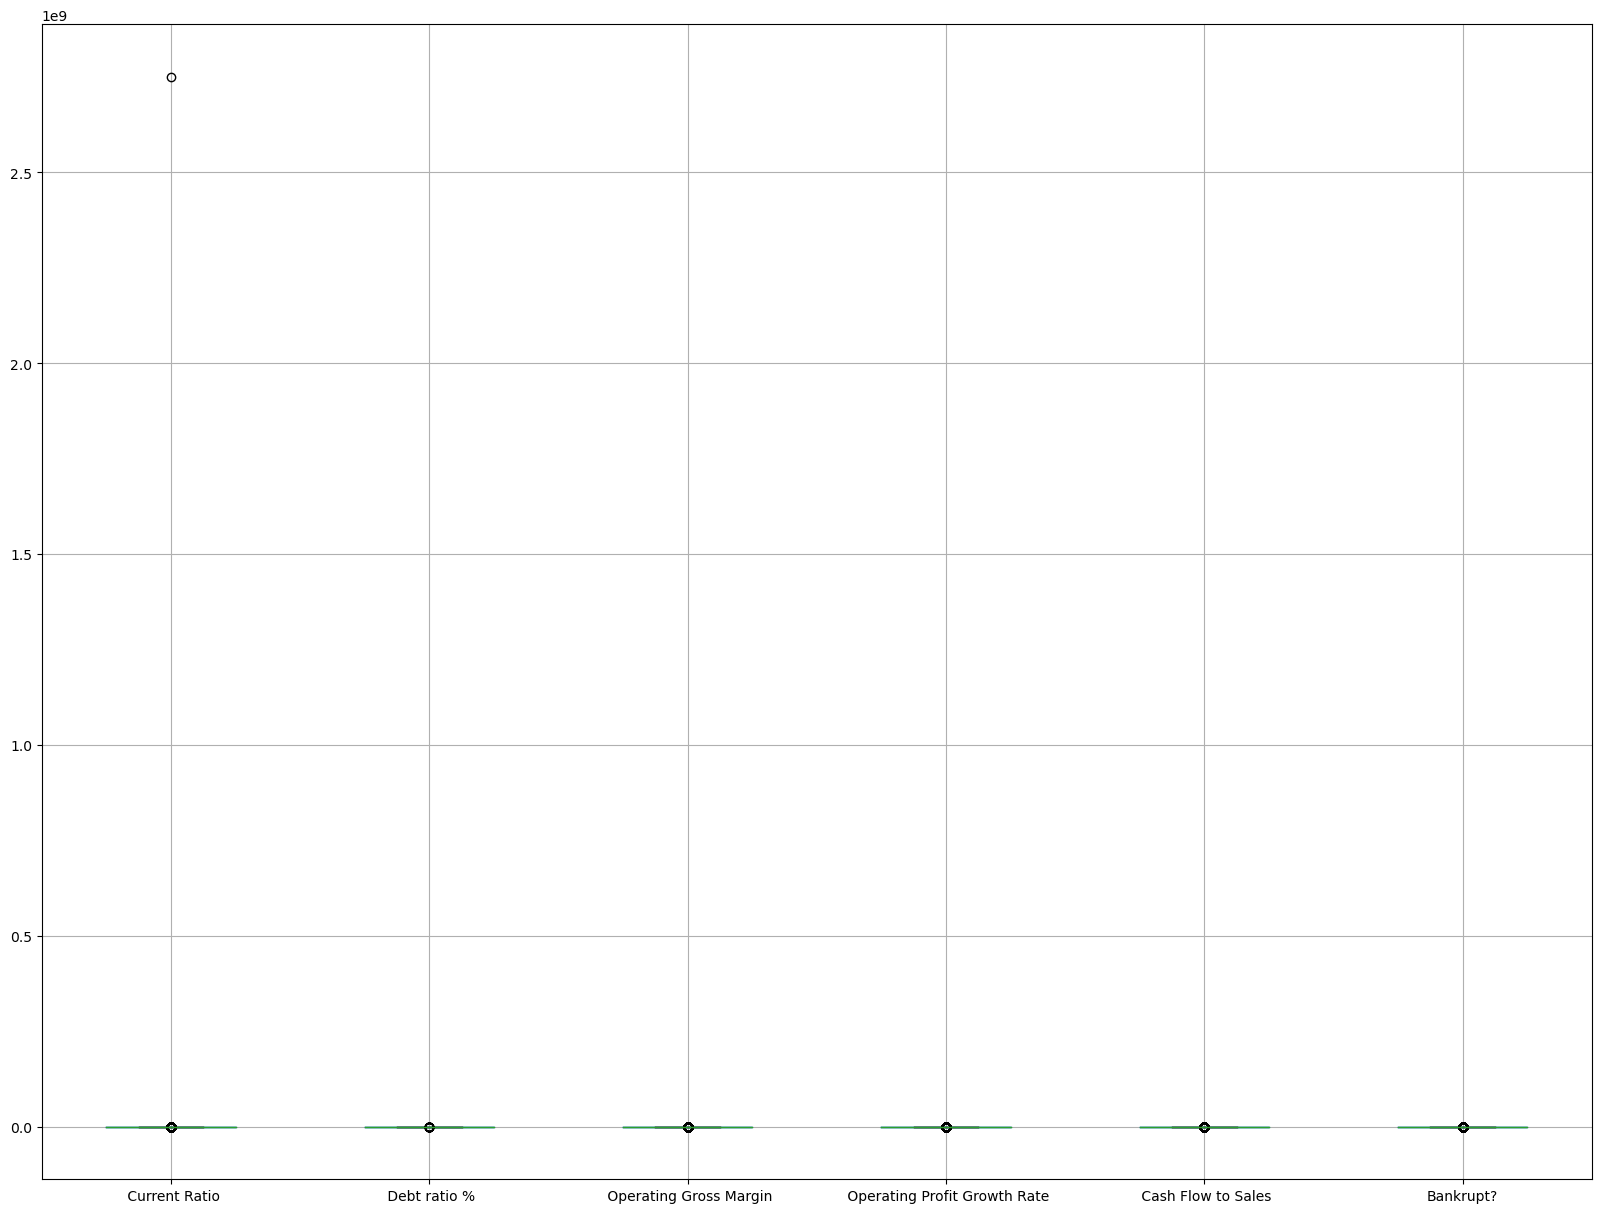

In [28]:
finr_df.boxplot(figsize=(20,15))

In [29]:
#Correlation
## correlation coeficient
finr_df.corr()

,Current Ratio,Debt ratio %,Operating Gross Margin,Operating Profit Growth Rate,Cash Flow to Sales,Bankrupt?
Current Ratio,1.000000,-0.015860,0.024945,0.000089,-0.000101,-0.002211
Debt ratio %,-0.015860,1.000000,-0.245460,-0.018100,-0.018201,0.250161
Operating Gross Margin,0.024945,-0.245460,1.000000,0.022867,-0.041559,-0.100043
Operating Profit Growth Rate,0.000089,-0.018100,0.022867,1.000000,-0.005175,-0.015168
Cash Flow to Sales,-0.000101,-0.018201,-0.041559,-0.005175,1.000000,0.000479
Bankrupt?,-0.002211,0.250161,-0.100043,-0.015168,0.000479,1.000000


In [30]:
## scatter plots
#fig, axs = plt.subplots(ncols=4,figsize=(10, 6))
#sns.scatterplot(x= finr_df[" Current Ratio"], y=finr_df["Bankrupt?"],hue = finr_df["Bankrupt?"],data = finr_df, ax=axs[0])
#sns.scatterplot(x= finr_df[" Debt ratio %"], y=finr_df["Bankrupt?"],hue = finr_df["Bankrupt?"],data = finr_df, ax=axs[1])
#sns.scatterplot(x= finr_df[" Operating Gross Margin"], y=finr_df["Bankrupt?"],hue = finr_df["Bankrupt?"],data = finr_df, ax=axs[2])
#sns.scatterplot(x= finr_df[" Operating Profit Growth Rate"], y=finr_df["Bankrupt?"],hue = finr_df["Bankrupt?"],data = finr_df, ax=axs[3])
#sns.scatterplot(x= finr_df[" Cash Flow to Sales"], y=finr_df["Bankrupt?"],hue = finr_df["Bankrupt?"],data = finr_df, ax=axs[4])


In [ ]:
#Exploring Binary and Categorical Data
## mode, expected value,barcharts,pie charts

In [ ]:
#Exploring Two or More Variables
## Hexagonal binning
## Contour plots
## Contingency tables